In [1]:
pip install radtraq

Note: you may need to restart the kernel to use updated packages.


In [176]:
# Need to install for better colorbar
pip install cmweather

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 227.2 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


You need to install the cmweather package for a more accurate colorbar when plotting.

In [ ]:
%pip install cmweather

The Xarray and Numpy packages allow datasets to be created and used. These packages and the matplotlib package are crucial to plot using the Thredds server.

In [ ]:
%pip install xarray
%pip install numpy
%pip install matplotlib 

You may need the RadTraQ package for plotting histograms. Additionally these packages might be useful in case any packages are missing. The Python ARM Radar Toolkit is important for working with weather radar data for basic plotting or more complex processing.

In [ ]:
%pip install radtraq
%pip install netCDF4
%pip install metpy
%pip install cartopy
%pip install siphon
%conda install -c conda-forge arm_pyart -y

If the code does not run the versions might be wrong, conda needs to be current and protobuf needs to be 3.20.X or earlier.

In [ ]:
%pip install conda==23.11.0
%pip install protobuf==3.19.0

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import netCDF4
import pyart
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy
from matplotlib.dates import DateFormatter


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
import numpy as np
import act.io.armfiles
from pyart.testing import get_test_data
import fsspec
from metpy.plots import USCOUNTIES
import warnings
warnings.filterwarnings("ignore")
import glob
import os

In [4]:
import siphon
from siphon.catalog import TDSCatalog
import xarray as xr
from xarray.backends import NetCDF4DataStore
from datetime import datetime
import sys
import cmweather

In [10]:
# Function used to make sure there are not any times without any data
def catch_bad_file(cds):
    try:
        return cds.remote_access(use_xarray=True)
    except:
        print("Exception: ", sys.exc_info()[0])

In [14]:
# Accessing the Thredds server
cat_url = 'https://thredds.crocus-urban.org/thredds/catalog/neiu-mrrpro-a1/catalog.xml'
cat = TDSCatalog(cat_url)
print(list(cat.datasets.keys()))

HTTPError: 502 Server Error: Bad Gateway for url: https://thredds.crocus-urban.org/thredds/catalog/neiu-mrrpro-a1/catalog.xml

In [13]:
# This is a test to make sure it is set up correctly

In [7]:
# list comprehension for files only doing 10 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[1:10]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [8]:
dsets

[None,
 <xarray.Dataset>
 Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                              spectrum_n_samples: 32)
 Coordinates:
   * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
   * time                    (time) datetime64[ns] 2023-05-23T22:00:00.0065538...
     elevation               (time) float32 ...
     azimuth                 (time) float32 ...
 Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
 Data variables: (12/31)
     volume_number           int32 ...
     time_coverage_start     |S128 ...
     time_coverage_end       |S128 ...
     time_reference          |S128 ...
     instrument_type         |S128 ...
     transfer_function       (range) float64 ...
     ...                      ...
     ML                      (time, range) float64 ...
     SNR                     (time, range) float32 ...
     index_spectra           (time, range) float64 ...
     spectrum_raw            (

In [9]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [ ]:
# Plotting one hour in single plots

In [14]:
ds = cat.datasets[111]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-05-31T23:00:00.0010900...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

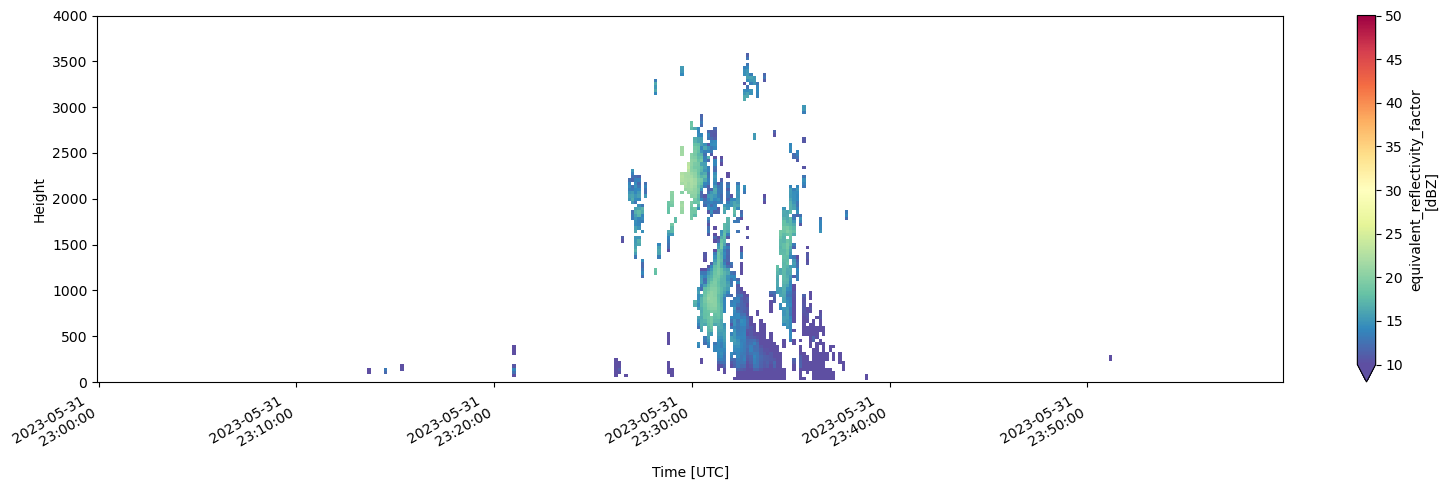

In [15]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 4000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

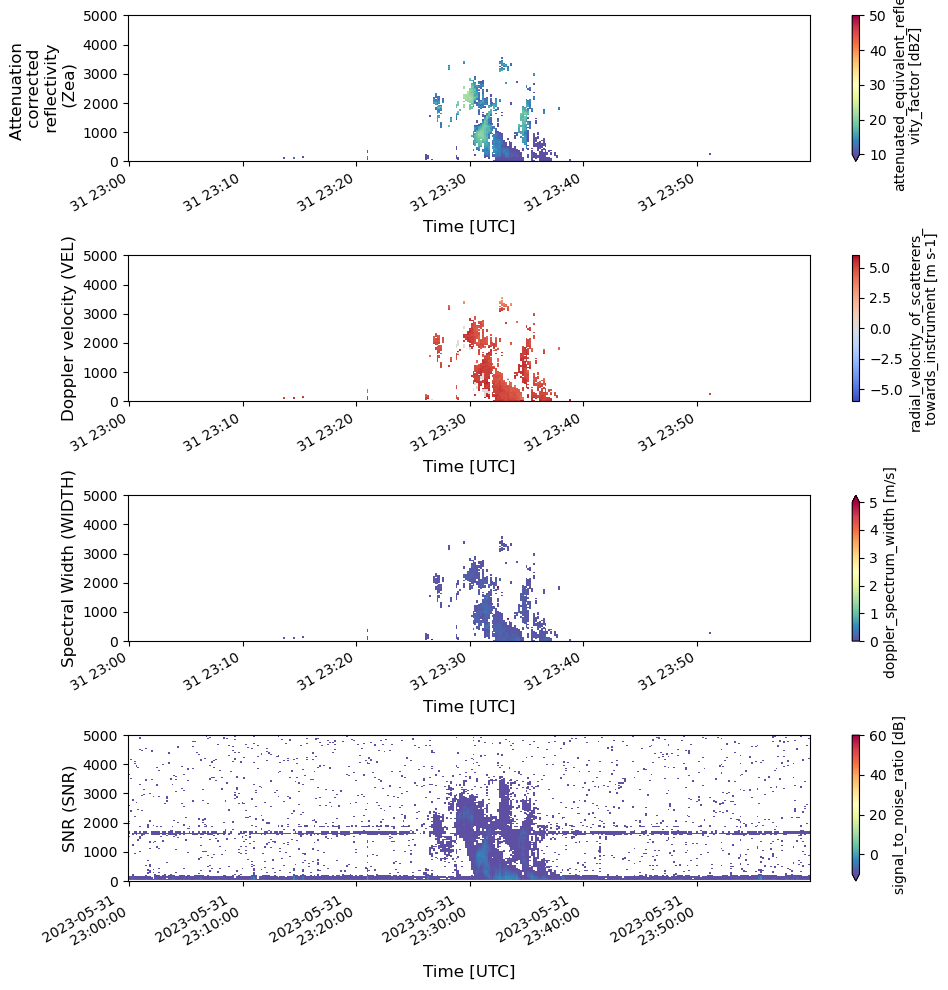

In [17]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [21]:
ds = cat.datasets[250]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-06T18:00:00.001088 ...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

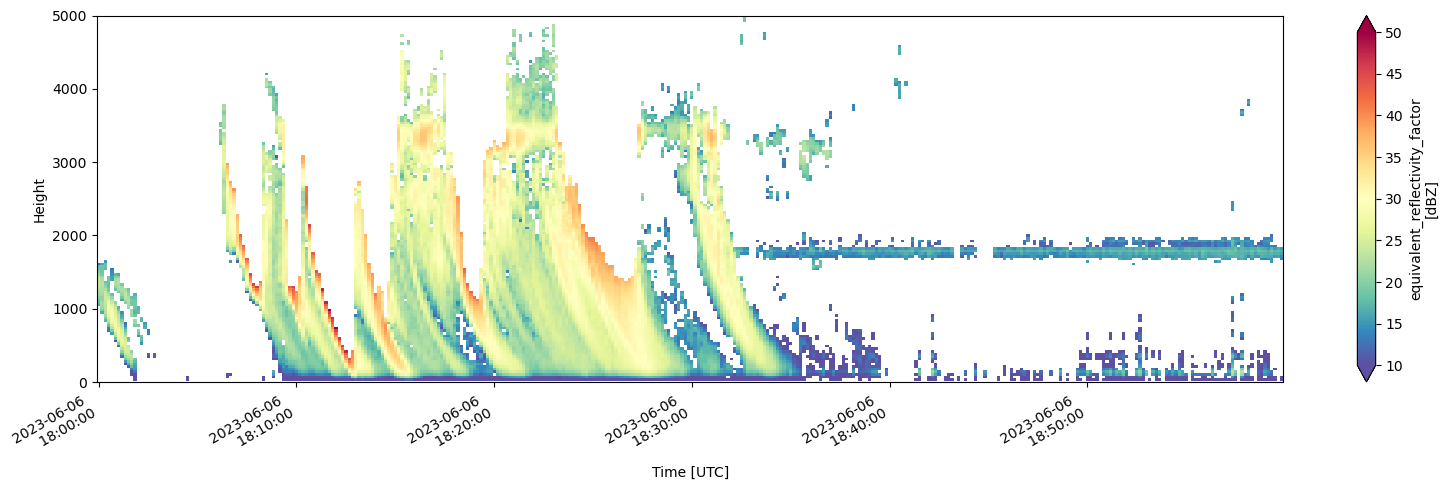

In [23]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

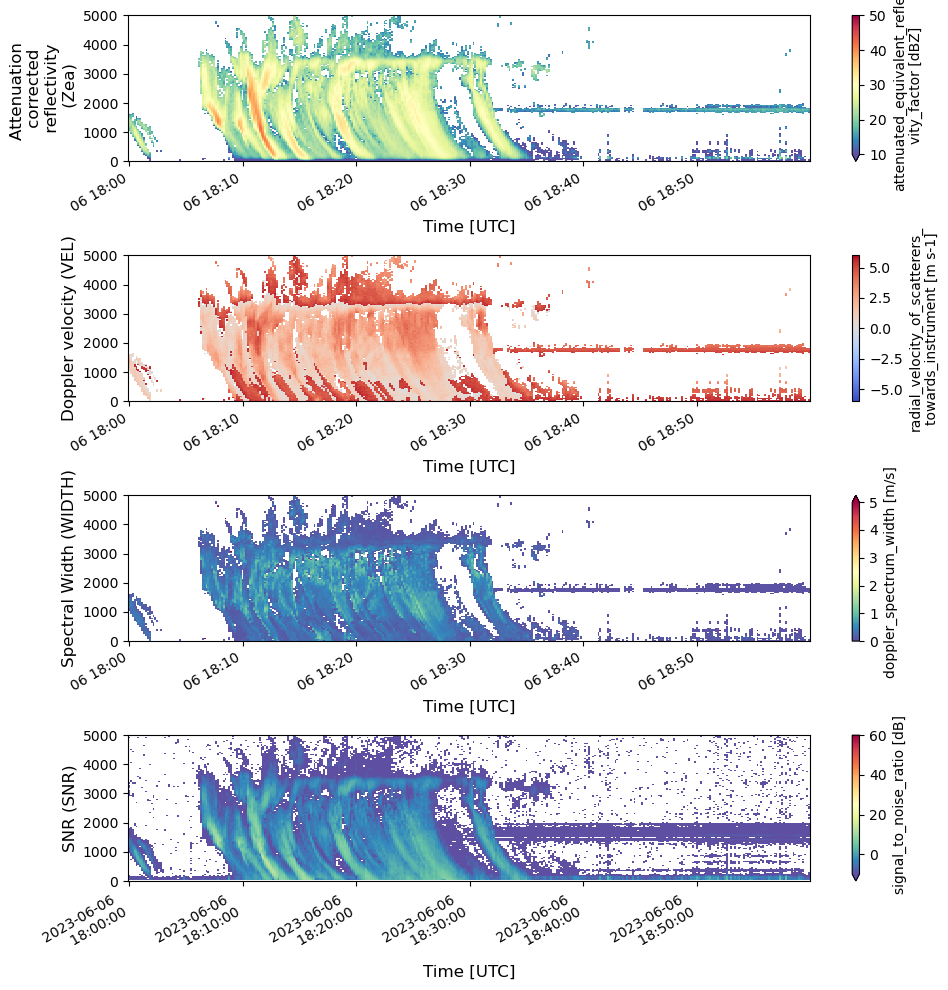

In [24]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [25]:
ds = cat.datasets[251]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-06T19:00:00.0011238...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

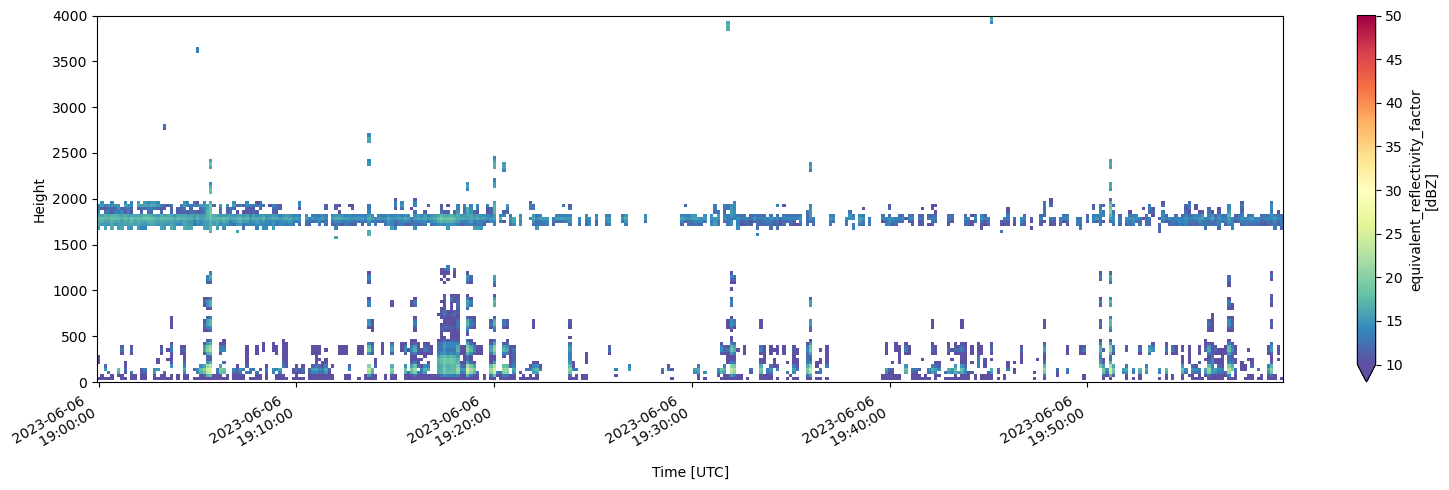

In [26]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 4000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

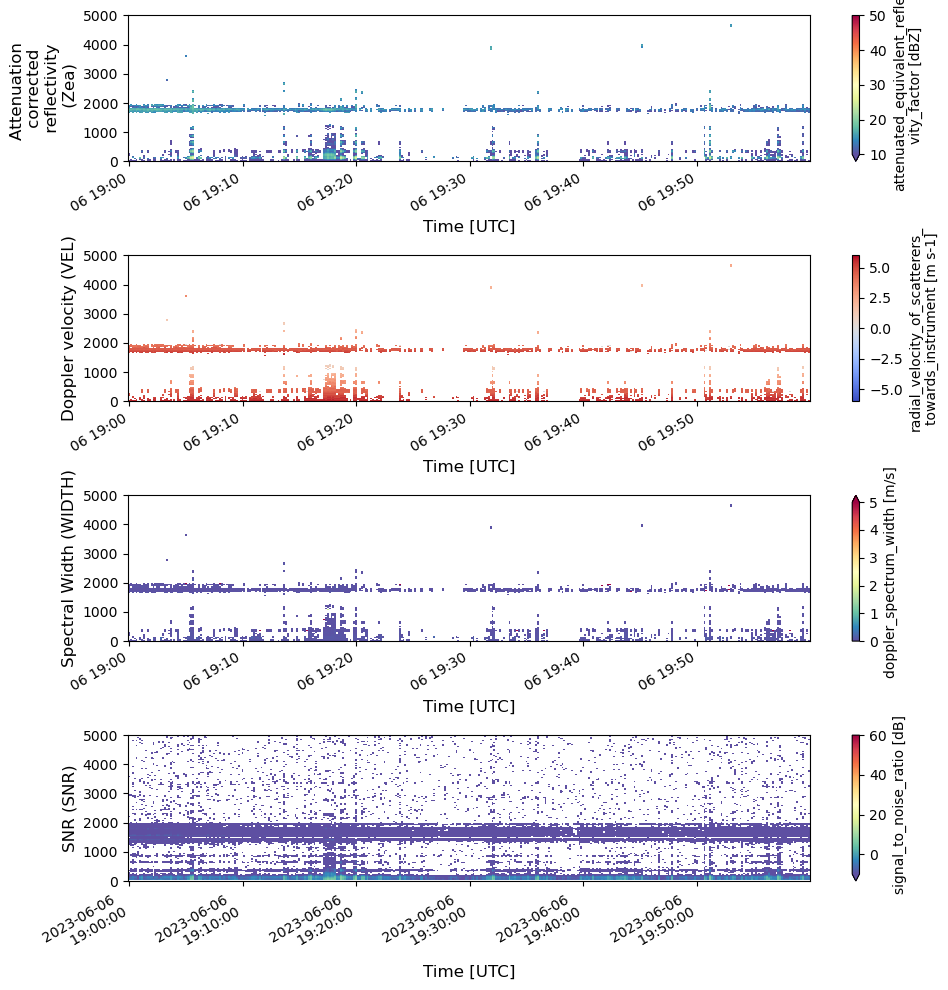

In [27]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [28]:
ds = cat.datasets[252]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-06T20:00:00.0010910...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

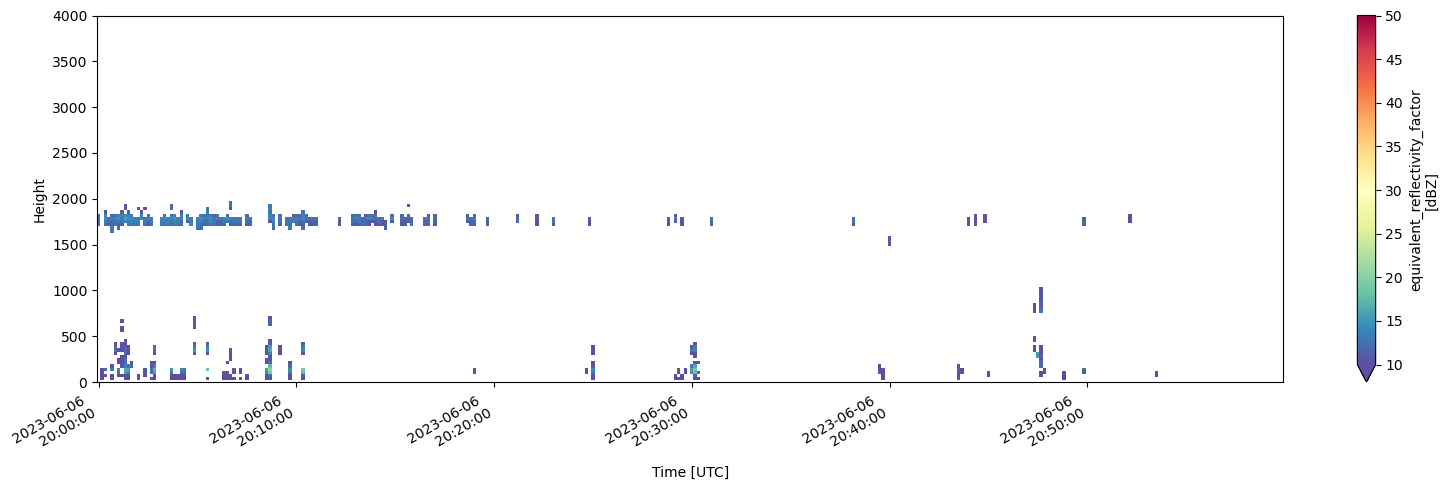

In [29]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 4000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

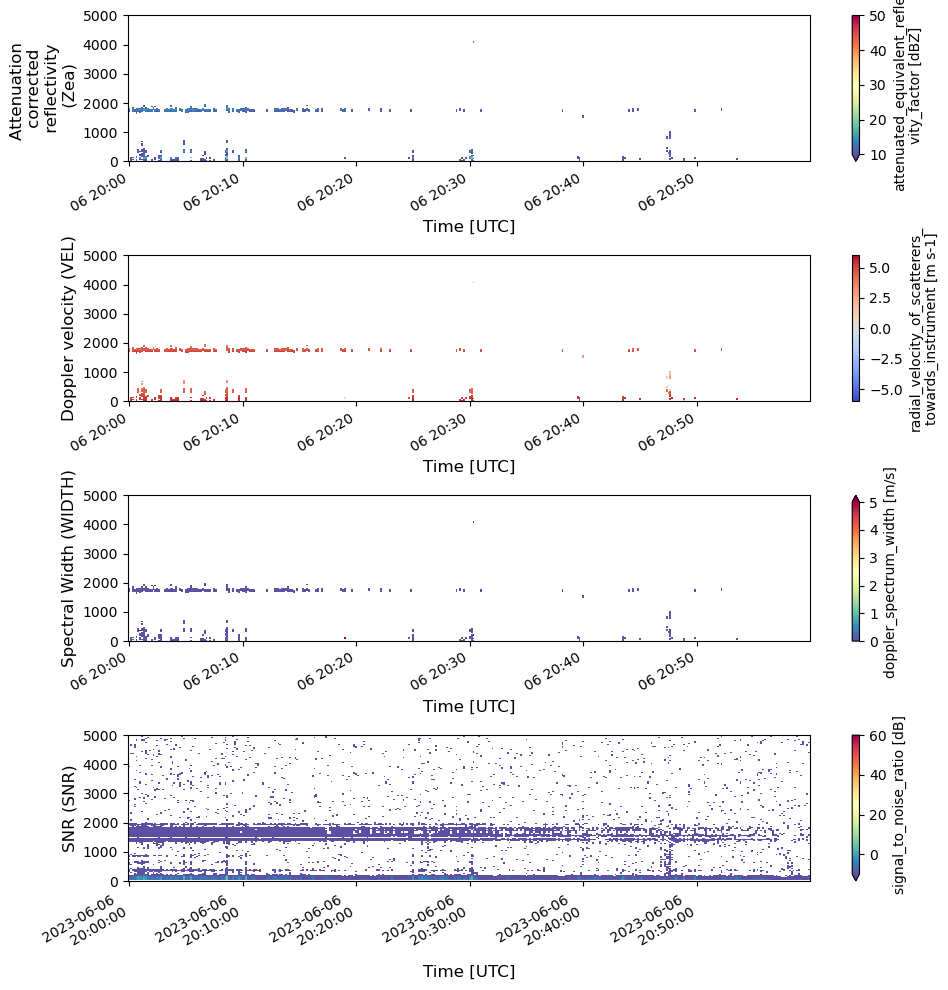

In [30]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [35]:
ds = cat.datasets[416]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-13T16:00:00.0010869...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

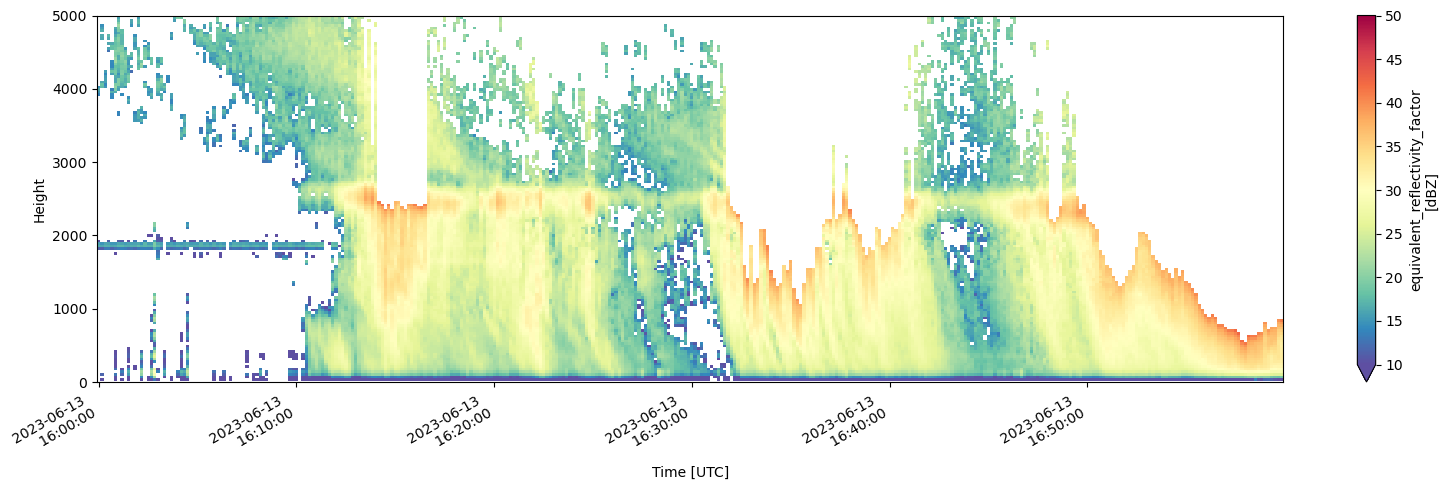

In [37]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

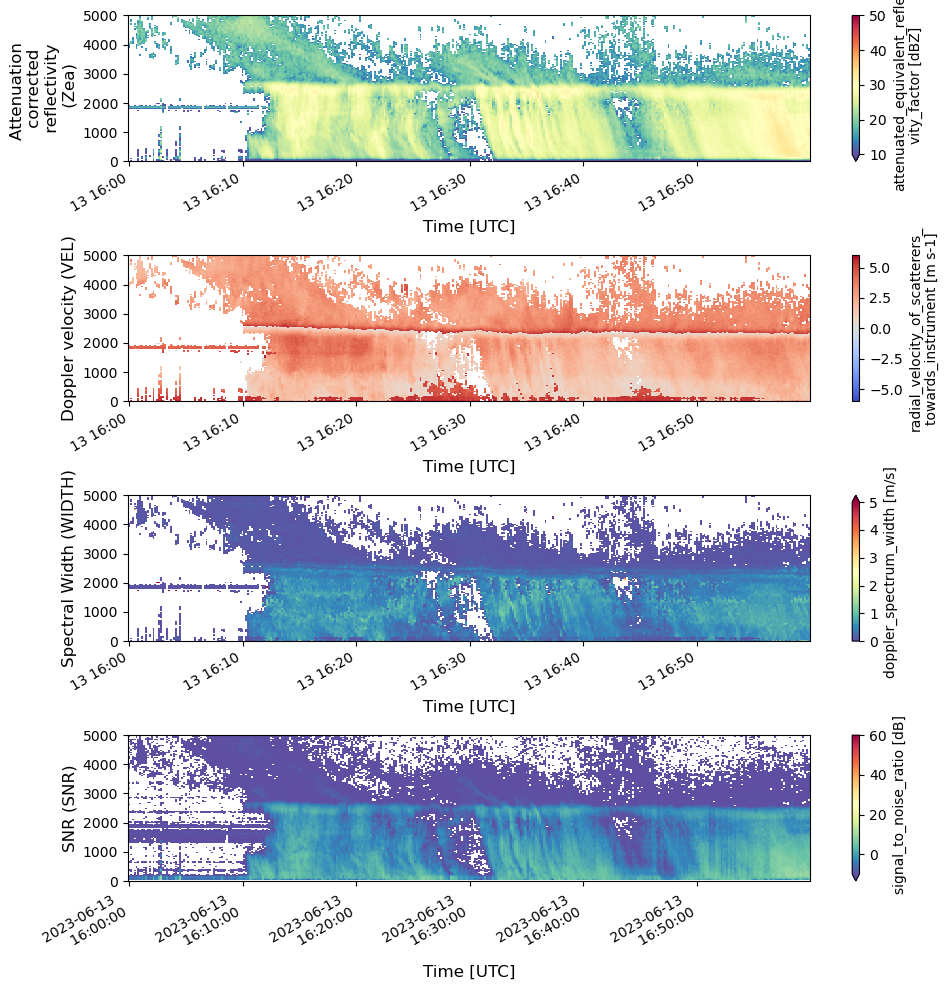

In [39]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [40]:
ds = cat.datasets[417]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-13T17:00:00.0010828...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

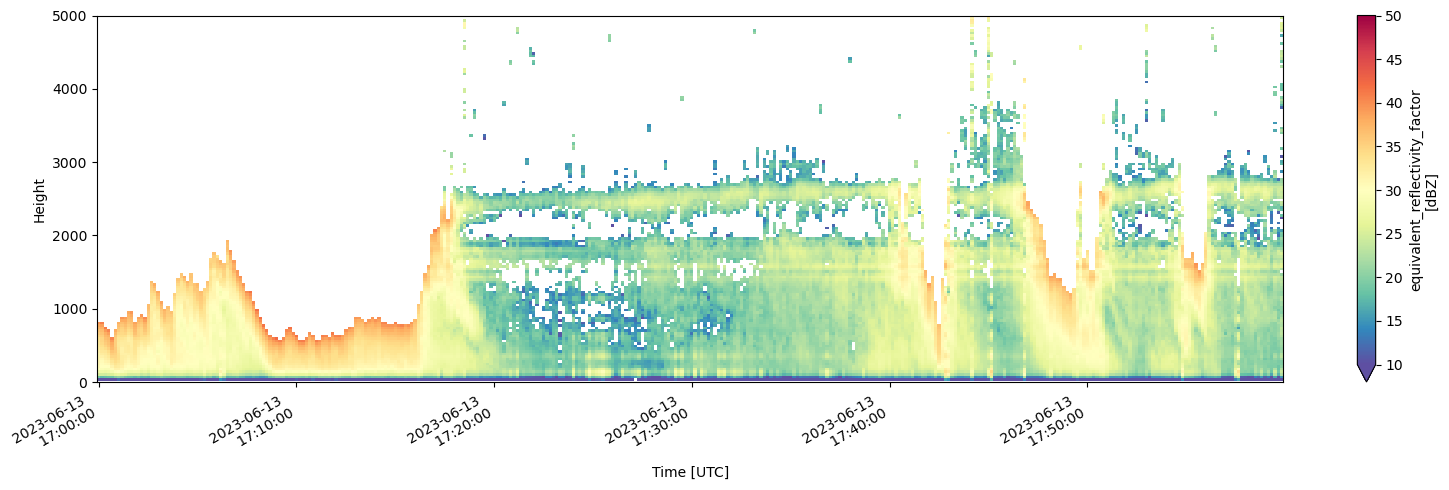

In [41]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

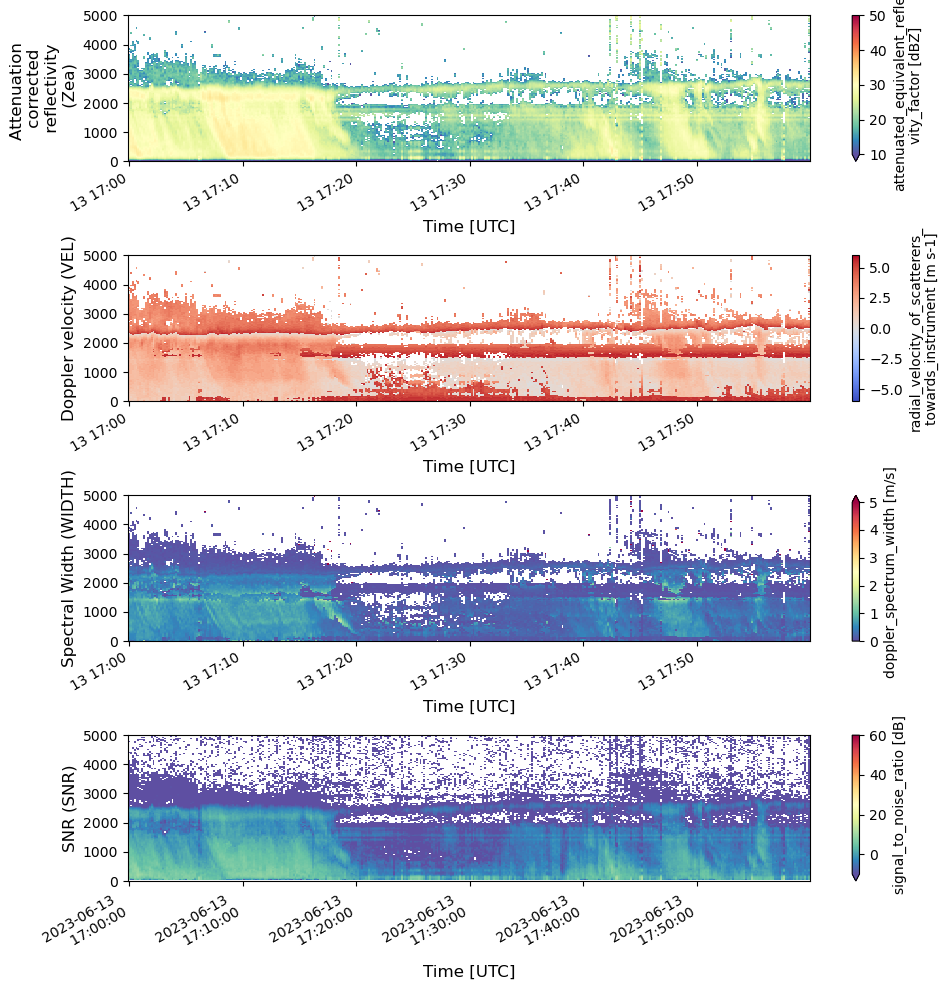

In [42]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [43]:
ds = cat.datasets[418]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-13T18:00:00.0010718...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

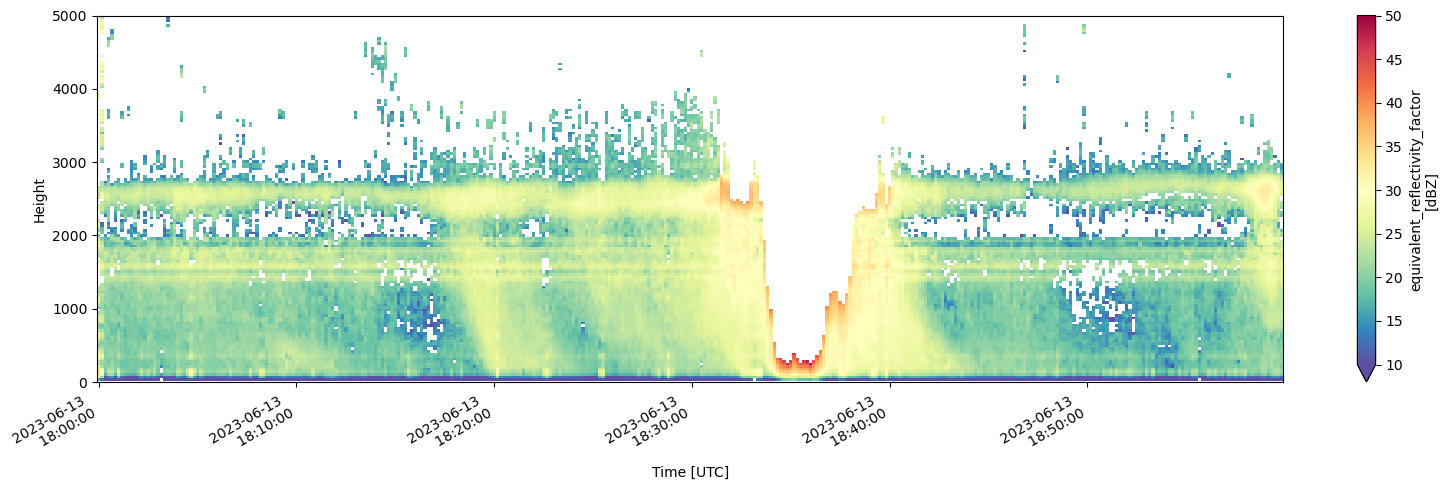

In [44]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

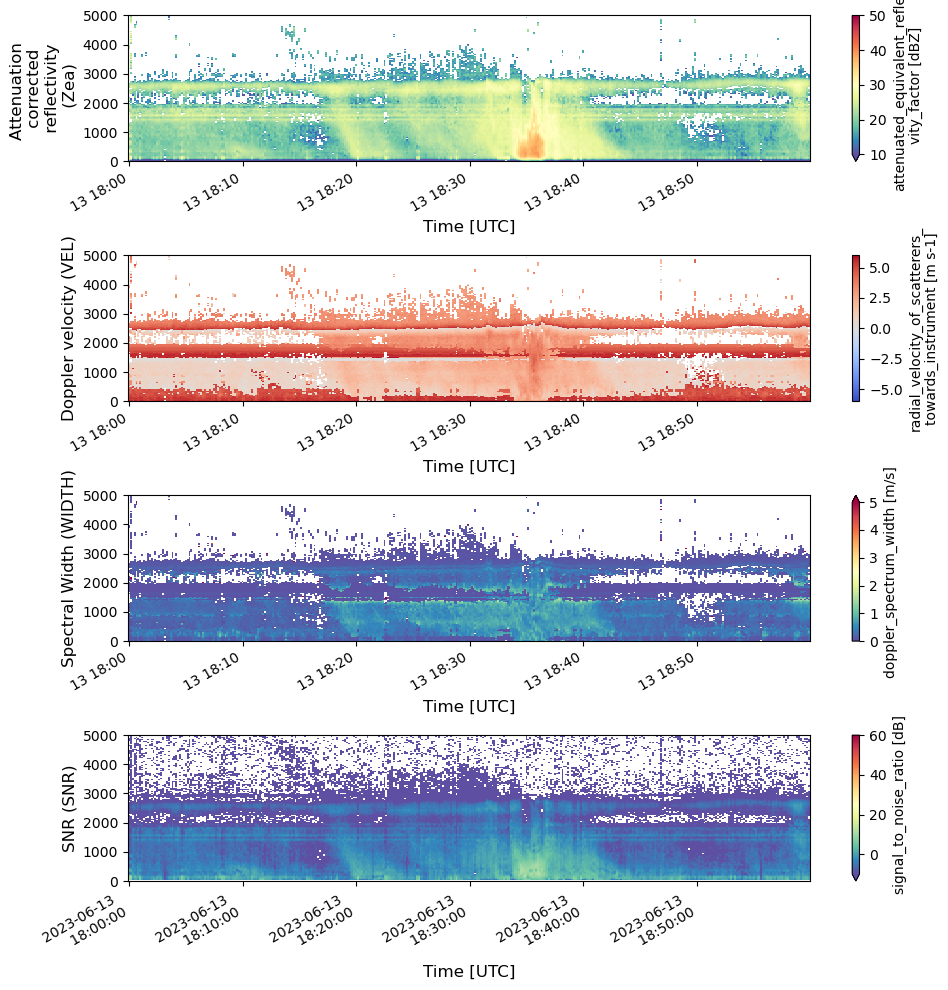

In [45]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [59]:
ds = cat.datasets[419]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-13T19:00:00.0010869...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

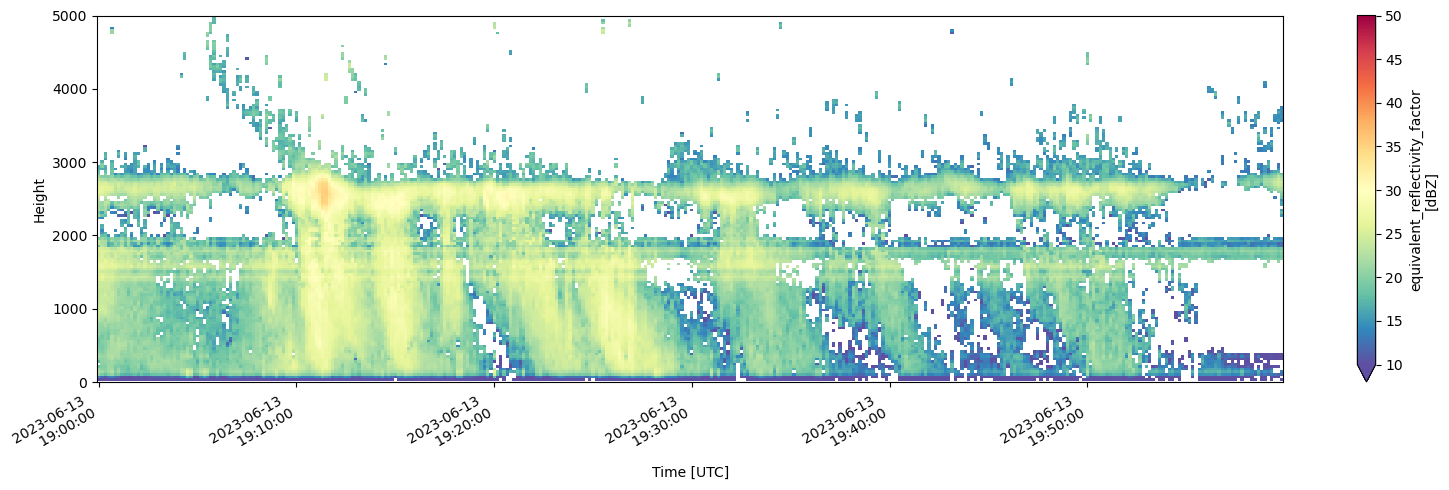

In [60]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

In [64]:
ds = cat.datasets[420]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-13T20:00:00.0010869...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

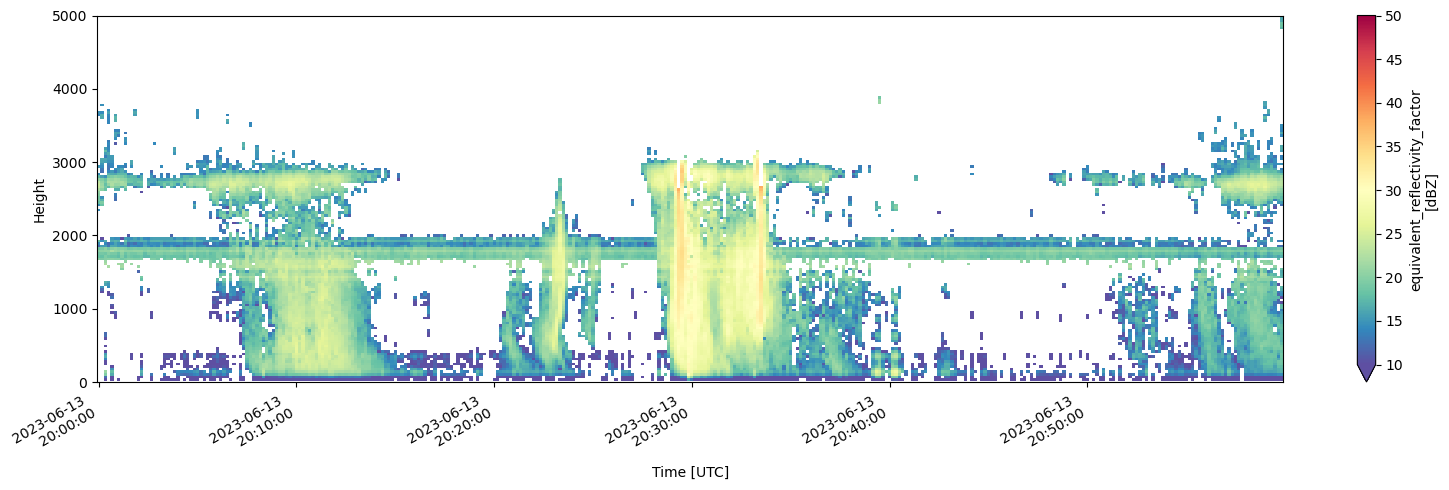

In [65]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

In [66]:
ds = cat.datasets[421]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-13T21:00:00.001088 ...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

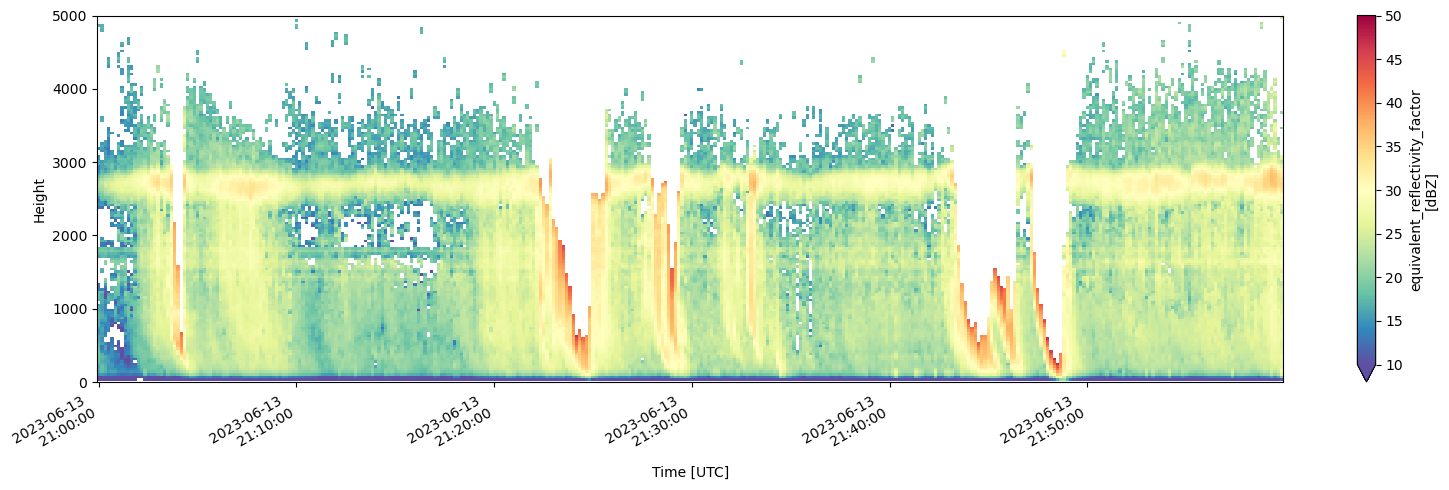

In [67]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

In [68]:
ds = cat.datasets[422]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-13T22:00:00.001088 ...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

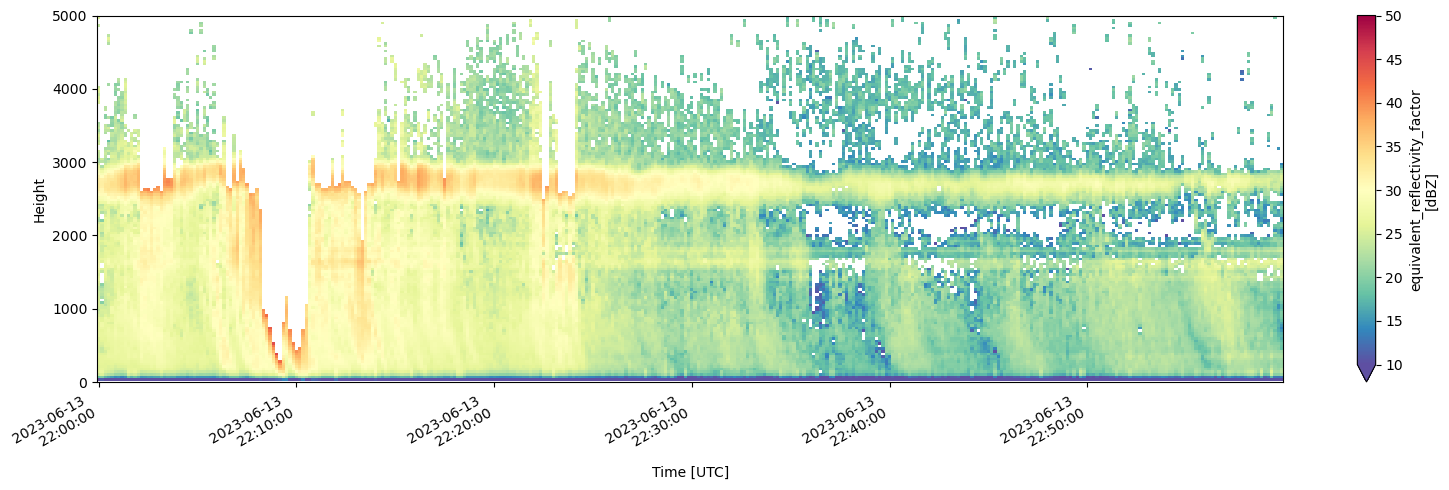

In [69]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

In [70]:
ds = cat.datasets[423]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-13T23:00:00.0010951...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

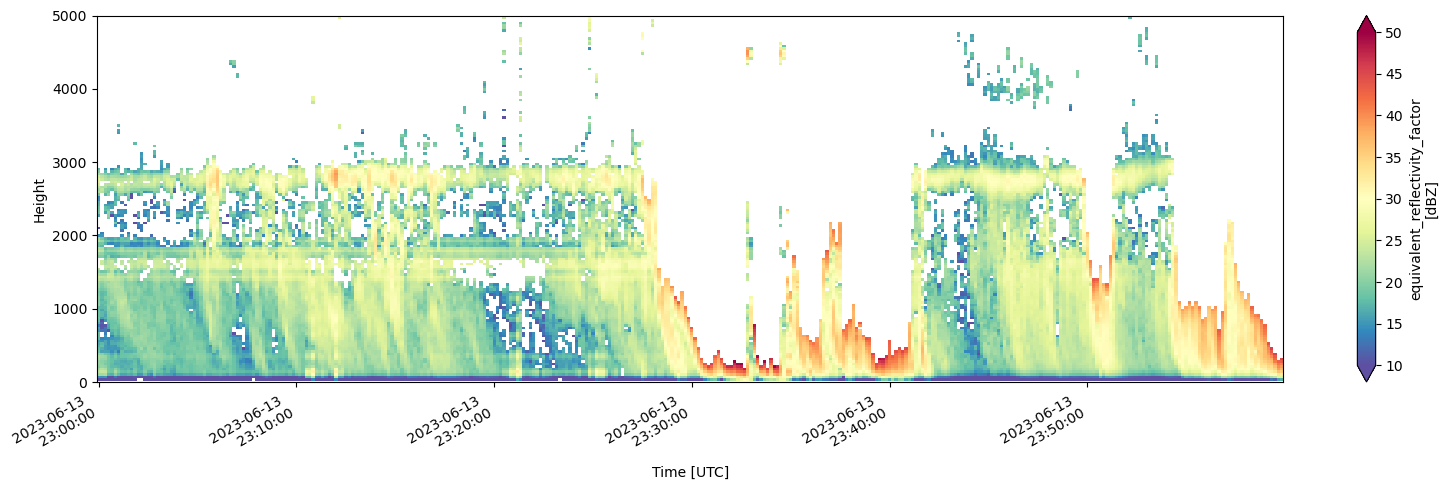

In [71]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

In [72]:
ds = cat.datasets[424]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-14T00:00:00.0010769...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

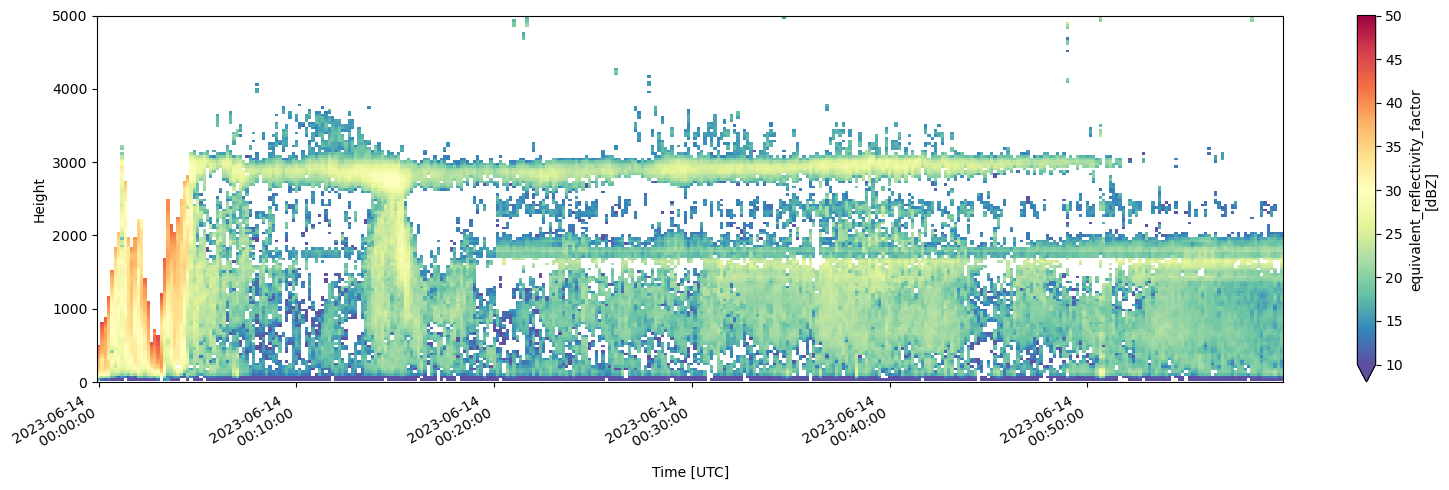

In [73]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

In [74]:
ds = cat.datasets[425]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-14T01:00:00.0010728...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

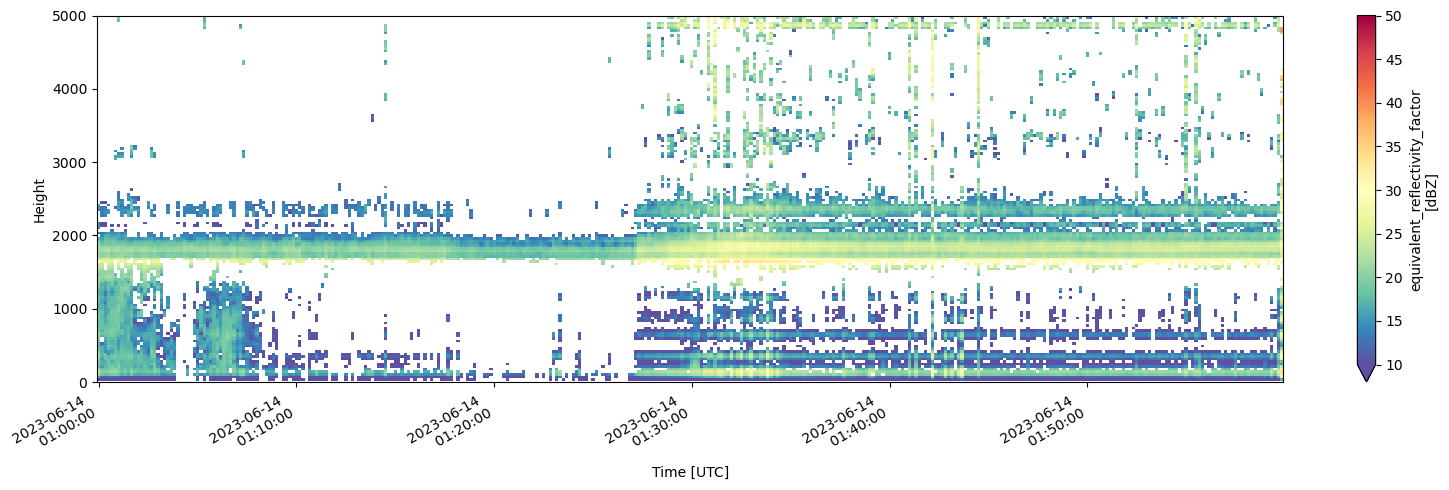

In [75]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

In [ ]:
# Plotting multiple hours in one plot

In [ ]:
# Days in the month of May

In [192]:
# list comprehension for files only doing 2 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[2:3]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [193]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [194]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 360, range: 256)>
[92160 values with dtype=float64]
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-05-23T22:00:00.006553856 ... 2023-0...
    elevation  (time) float32 ...
    azimuth    (time) float32 ...
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

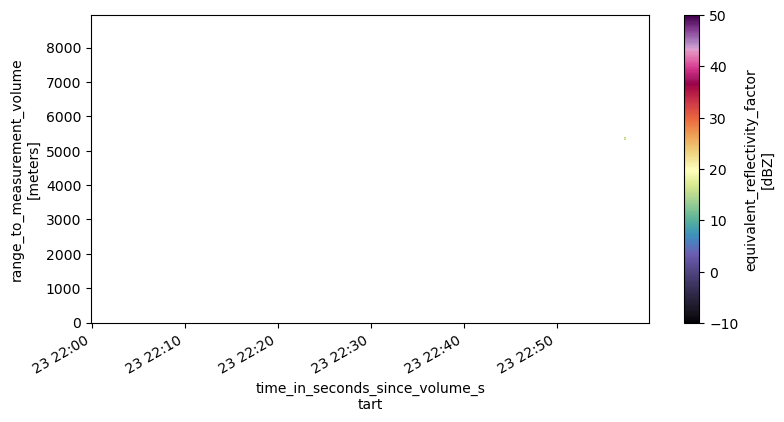

In [195]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('May 23.png', dpi=300, bbox_inches='tight')

In [197]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[4:28]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [198]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [199]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,  9.03417827,         nan, ...,         nan,
                nan,         nan],
       [        nan, 10.52233338, 17.92053318, ...,         nan,
                nan,         nan],
       [        nan, 10.58332892, 17.43236638, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-05-24T00:00:00.006578944 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

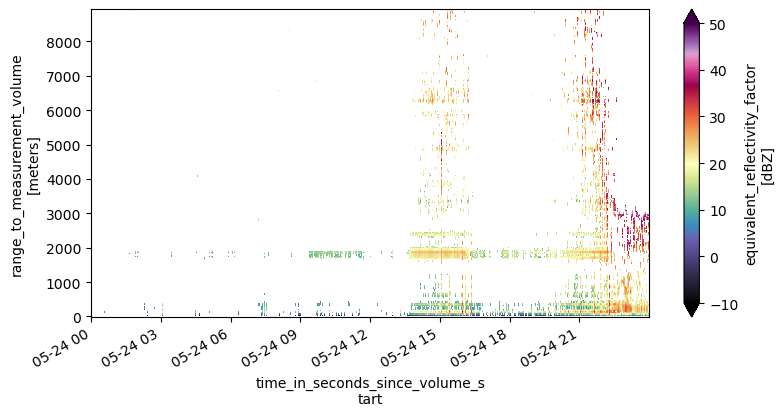

In [200]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('May 24.png', dpi=300, bbox_inches='tight')

In [202]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[28:52]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [203]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [204]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[        nan,  9.39506734, 16.9034384 , ...,         nan,
                nan,         nan],
       [        nan, 10.36788807, 18.13455449, ...,         nan,
                nan,         nan],
       [        nan, 10.93371341, 18.27384219, ...,         nan,
                nan,         nan],
       ...,
       [        nan,  9.26793995, 18.81292924, ...,         nan,
                nan,         nan],
       [        nan,         nan, 19.02867339, ...,         nan,
                nan,         nan],
       [        nan, 10.55488633, 19.40834932, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-05-25T00:00:00.006561024 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

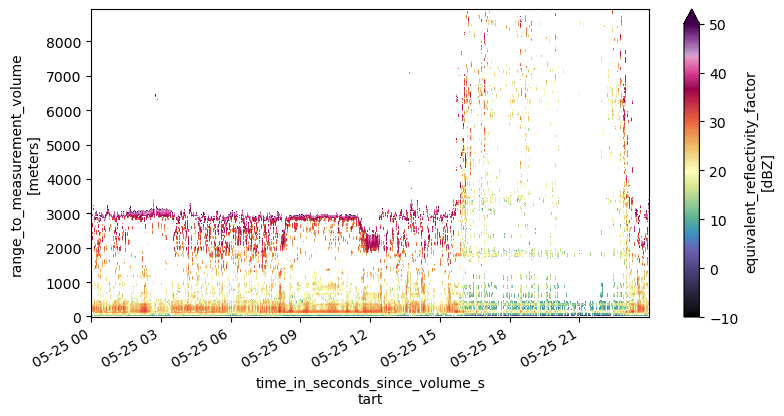

In [205]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('May 25.png', dpi=300, bbox_inches='tight')

In [207]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[52:76]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [208]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [209]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[        nan, 10.22401805, 18.52269782, ...,         nan,
                nan,         nan],
       [        nan,  9.91349416, 20.4122422 , ...,         nan,
                nan,         nan],
       [        nan,  9.73895272, 18.91657102, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-05-26T00:00:00.006558976 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

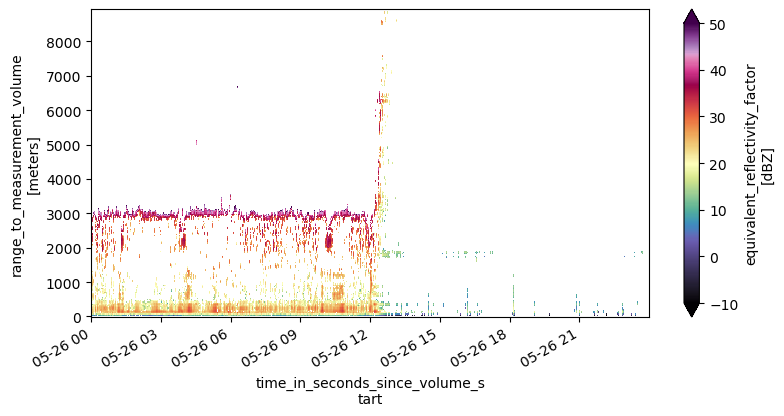

In [210]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('May 26.png', dpi=300, bbox_inches='tight')

In [14]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[76:100]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [15]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [16]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8401, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-05-27T00:00:00.006568960 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

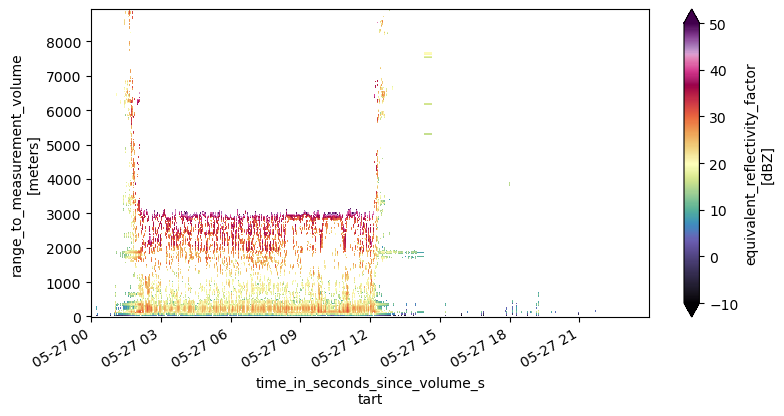

In [17]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('May 27.png', dpi=300, bbox_inches='tight')

In [21]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[100:109]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [22]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [23]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3240, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-05-28T00:00:00.001088 ... 2023-05-2...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

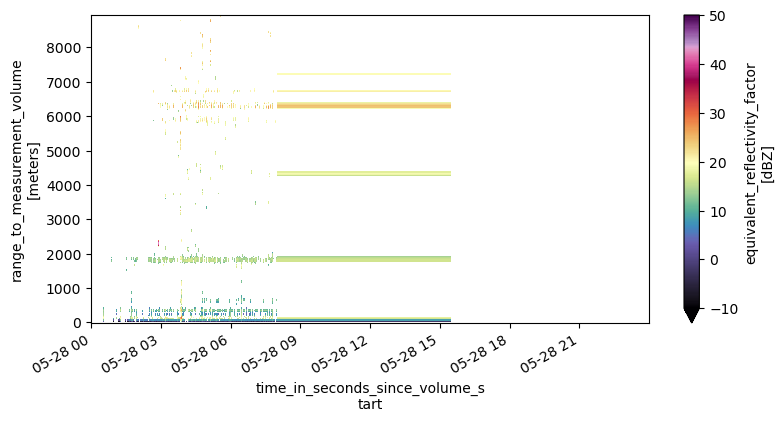

In [24]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('May 28.png', dpi=300, bbox_inches='tight')

In [30]:
# list comprehension for files only doing 1 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[109:110]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [31]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [32]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 360, range: 256)>
[92160 values with dtype=float64]
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-05-29T23:00:00.001085952 ... 2023-0...
    elevation  (time) float32 ...
    azimuth    (time) float32 ...
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

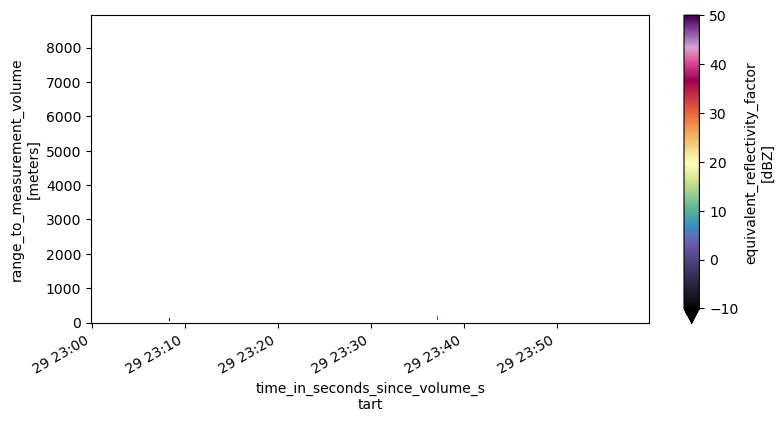

In [33]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('May 29.png', dpi=300, bbox_inches='tight')

In [35]:
# list comprehension for files only doing 1 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[110:111]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [36]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [37]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 360, range: 256)>
[92160 values with dtype=float64]
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-05-30T23:00:00.001131008 ... 2023-0...
    elevation  (time) float32 ...
    azimuth    (time) float32 ...
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

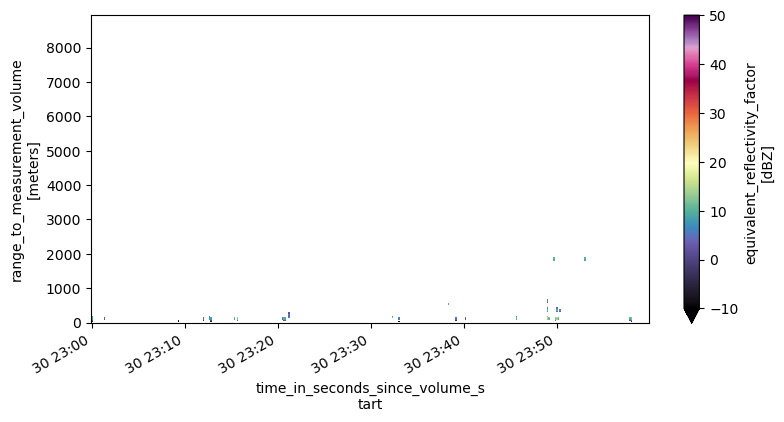

In [38]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('May 30.png', dpi=300, bbox_inches='tight')

In [40]:
# list comprehension for files only doing 1 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[111:112]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [41]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [42]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 360, range: 256)>
[92160 values with dtype=float64]
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-05-31T23:00:00.001090048 ... 2023-0...
    elevation  (time) float32 ...
    azimuth    (time) float32 ...
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

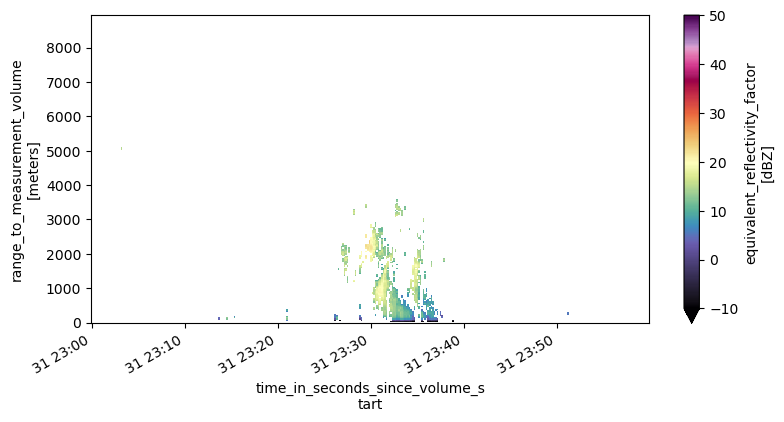

In [43]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('May 31.png', dpi=300, bbox_inches='tight')

In [54]:
#Checking the correct time frame
ds = cat.datasets[524:547]
ds

[crocus-neiu-mrrpro-a1-20231005.000000.nc,
 crocus-neiu-mrrpro-a1-20231005.010000.nc,
 crocus-neiu-mrrpro-a1-20231005.020000.nc,
 crocus-neiu-mrrpro-a1-20231005.030000.nc,
 crocus-neiu-mrrpro-a1-20231005.040000.nc,
 crocus-neiu-mrrpro-a1-20231005.050000.nc,
 crocus-neiu-mrrpro-a1-20231005.060000.nc,
 crocus-neiu-mrrpro-a1-20231005.070000.nc,
 crocus-neiu-mrrpro-a1-20231005.080000.nc,
 crocus-neiu-mrrpro-a1-20231005.090000.nc,
 crocus-neiu-mrrpro-a1-20231005.100000.nc,
 crocus-neiu-mrrpro-a1-20231005.110000.nc,
 crocus-neiu-mrrpro-a1-20231005.120000.nc,
 crocus-neiu-mrrpro-a1-20231005.130000.nc,
 crocus-neiu-mrrpro-a1-20231005.140000.nc,
 crocus-neiu-mrrpro-a1-20231005.150000.nc,
 crocus-neiu-mrrpro-a1-20231005.160000.nc,
 crocus-neiu-mrrpro-a1-20231005.170000.nc,
 crocus-neiu-mrrpro-a1-20231005.180000.nc,
 crocus-neiu-mrrpro-a1-20231005.190000.nc,
 crocus-neiu-mrrpro-a1-20231005.200000.nc,
 crocus-neiu-mrrpro-a1-20231005.210000.nc,
 crocus-neiu-mrrpro-a1-20231005.220000.nc]

In [ ]:
# Days in the month of June

In [164]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[112:136]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [165]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [166]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-01T00:00:00.001095168 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

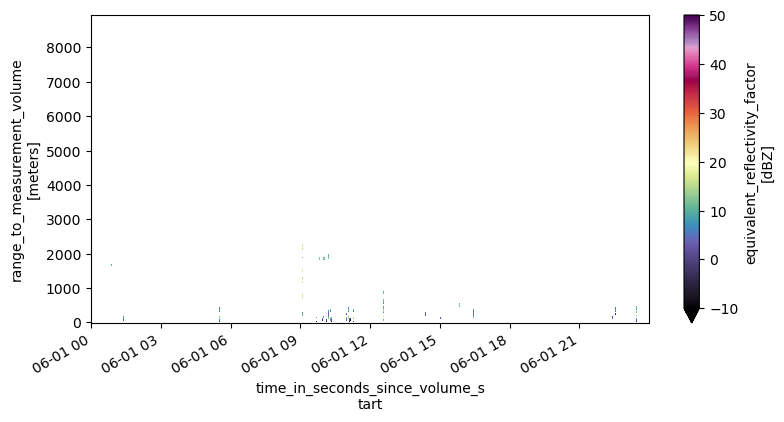

In [181]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 1.png', dpi=300, bbox_inches='tight')

In [46]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[136:160]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [47]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [48]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-02T00:00:00.001085952 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

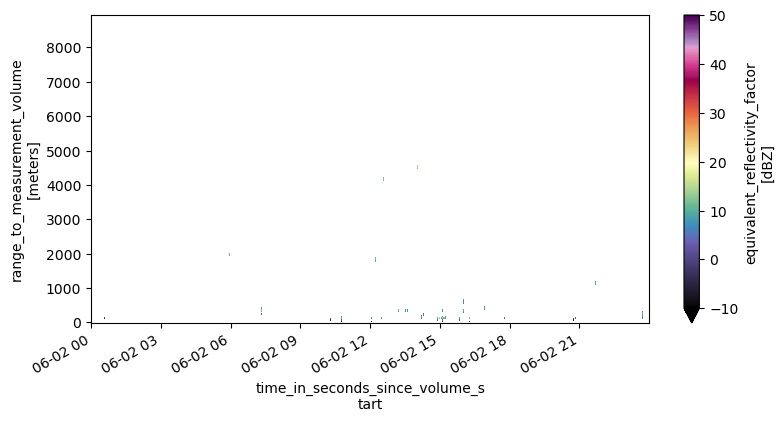

In [49]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 2.png', dpi=300, bbox_inches='tight')

In [50]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[160:184]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [51]:
cat.datasets


['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [52]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-03T00:00:00.001084160 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

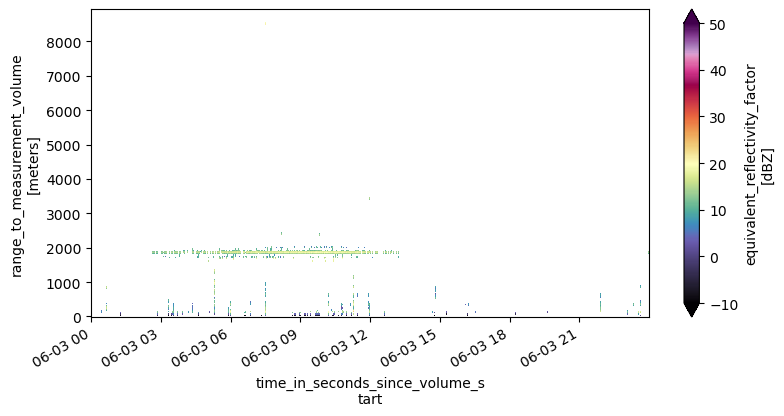

In [53]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 3.png', dpi=300, bbox_inches='tight')

In [54]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[184:208]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [55]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [56]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, -9.29427782, -2.13353957, ...,         nan,
                nan,         nan],
       ...,
       [        nan, -7.01445985,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-04T00:00:00.001084160 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

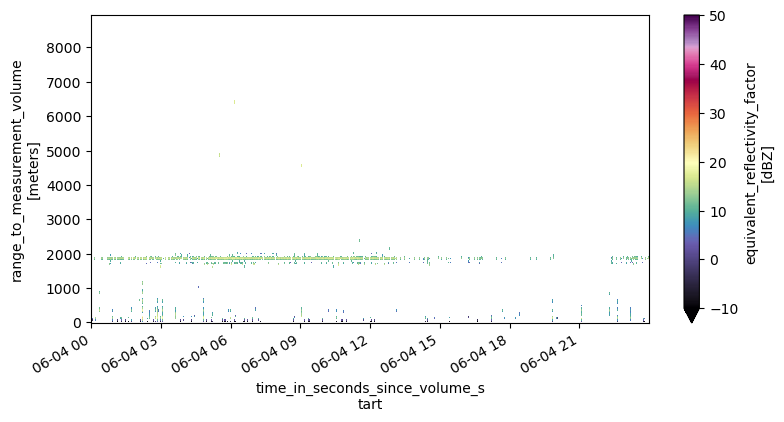

In [57]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 4.png', dpi=300, bbox_inches='tight')

In [58]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[208:232]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [59]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [60]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, -9.45230362,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-05T00:00:00.001089024 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

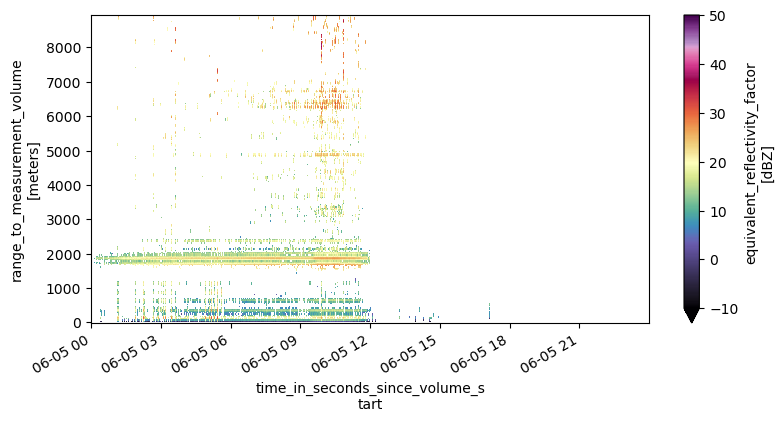

In [61]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 5.png', dpi=300, bbox_inches='tight')

In [62]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[232:256]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [63]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [64]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-06T00:00:00.001088 ... 2023-06-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

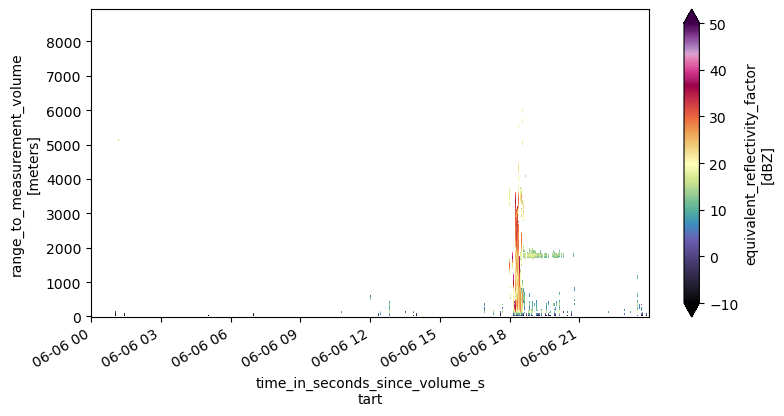

In [65]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 6.png', dpi=300, bbox_inches='tight')

In [66]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[256:280]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [67]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [68]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-07T00:00:00.001082880 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

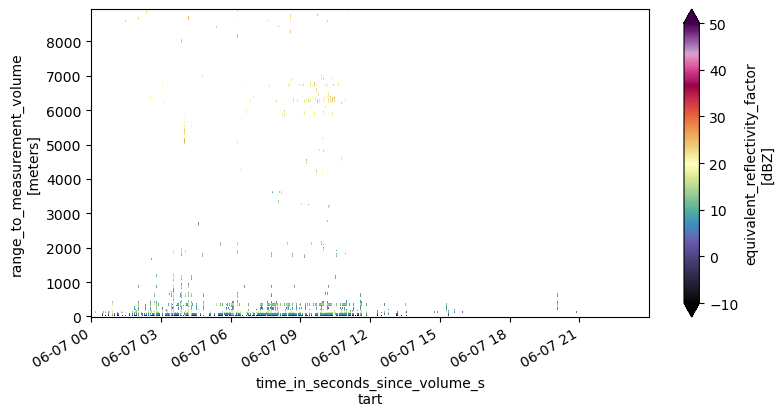

In [69]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 7.png', dpi=300, bbox_inches='tight')

In [70]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[280:304]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [71]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [72]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-08T00:00:00.001071104 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

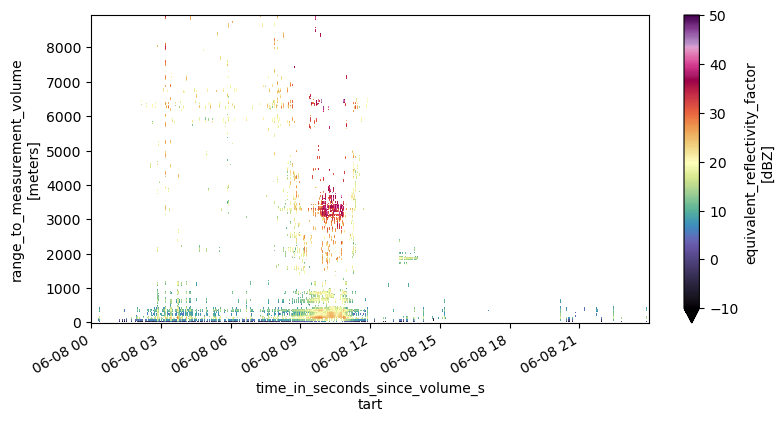

In [73]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 8.png', dpi=300, bbox_inches='tight')

In [74]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[304:328]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [75]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [76]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-09T00:00:00.001084160 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

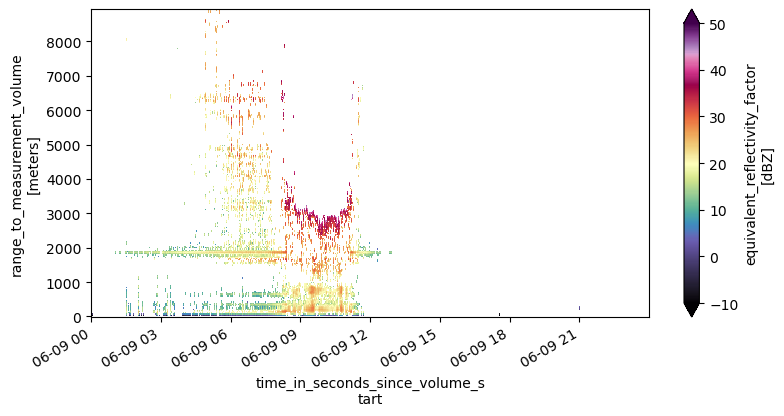

In [77]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 9.png', dpi=300, bbox_inches='tight')

In [78]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[328:352]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [79]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [80]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-10T00:00:00.001082880 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

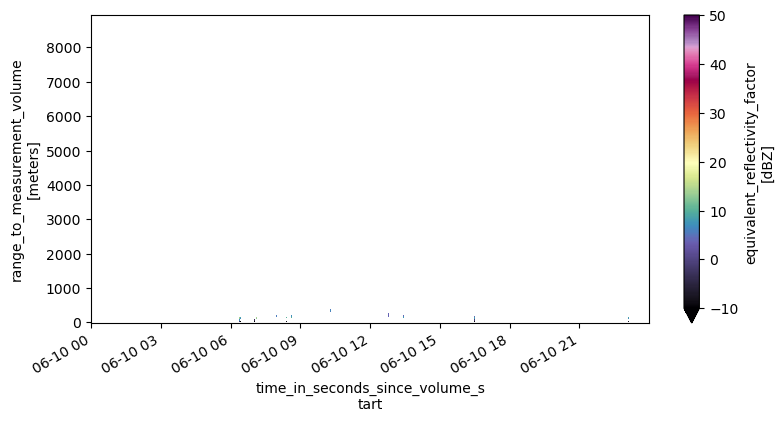

In [81]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 10.png', dpi=300, bbox_inches='tight')

In [82]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[352:376]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [83]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [84]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan, 11.50070052, 20.817775  , ...,         nan,
                nan,         nan],
       [        nan, 11.45473063, 19.64113799, ...,         nan,
                nan,         nan],
       [        nan, 11.82801565, 21.29071469, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-11T00:00:00.001078016 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

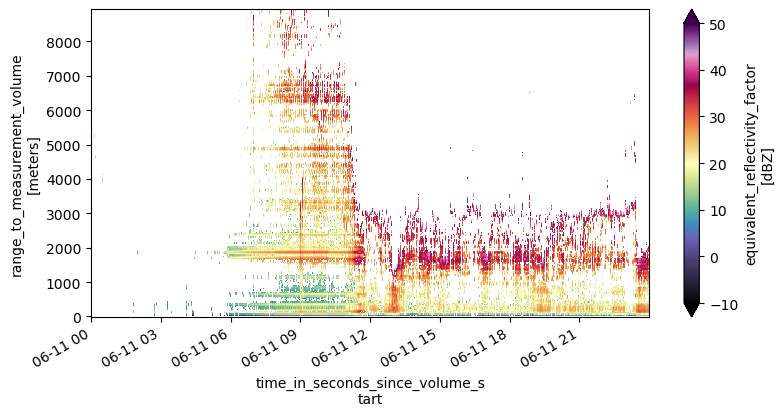

In [85]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 11.png', dpi=300, bbox_inches='tight')

In [86]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[376:400]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [87]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [88]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8640, range: 256)>
array([[        nan, 12.20796268, 21.23206762, ...,         nan,
                nan,         nan],
       [        nan, 12.11988554, 21.26184097, ...,         nan,
                nan,         nan],
       [        nan, 12.23118582, 21.19519336, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-12T00:00:00.001089024 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

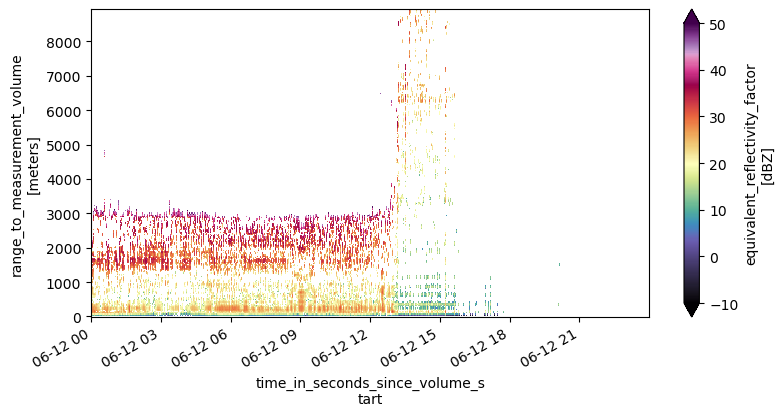

In [89]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 12.png', dpi=300, bbox_inches='tight')

In [93]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[400:424]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [94]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [95]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8280, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan, 11.44103304, 23.47721928, ...,         nan,
                nan,         nan],
       [        nan, 15.94193627, 26.19820297, ...,         nan,
                nan,         nan],
       [        nan, 16.99881919, 25.72733208, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-13T00:00:00.001085952 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

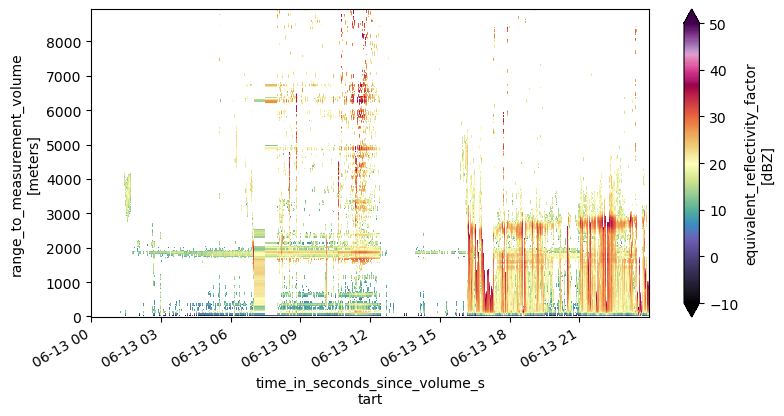

In [96]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 13.png', dpi=300, bbox_inches='tight')

In [97]:
# list comprehension for files only doing 24 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[424:447]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [98]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [99]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8280, range: 256)>
array([[        nan, 17.91677384, 25.01412754, ...,         nan,
                nan,         nan],
       [        nan, 12.52017217, 22.26904238, ...,         nan,
                nan,         nan],
       [        nan, 10.84670818, 22.61865405, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-14T00:00:00.001076992 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

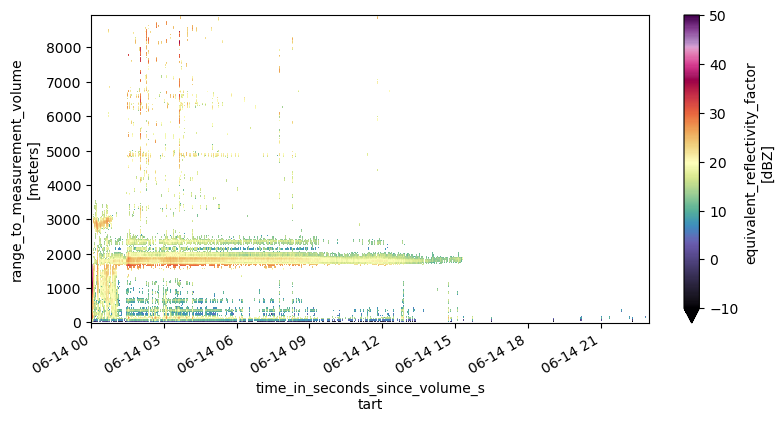

In [100]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 14.png', dpi=300, bbox_inches='tight')

In [ ]:
# Days in the month of October

In [55]:
# list comprehension for files only doing 23 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[524:547]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [56]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230523.210000.nc', 'crocus-neiu-mrrpro-a1-20230523.220000.nc', 'crocus-neiu-mrrpro-a1-20230523.230000.nc', 'crocus-neiu-mrrpro-a1-20230524.000000.nc', 'crocus-neiu-mrrpro-a1-20230524.010000.nc', 'crocus-neiu-mrrpro-a1-20230524.020000.nc', 'crocus-neiu-mrrpro-a1-20230524.030000.nc', 'crocus-neiu-mrrpro-a1-20230524.040000.nc', 'crocus-neiu-mrrpro-a1-20230524.050000.nc', 'crocus-neiu-mrrpro-a1-20230524.060000.nc', 'crocus-neiu-mrrpro-a1-20230524.070000.nc', 'crocus-neiu-mrrpro-a1-20230524.080000.nc', 'crocus-neiu-mrrpro-a1-20230524.090000.nc', 'crocus-neiu-mrrpro-a1-20230524.100000.nc', 'crocus-neiu-mrrpro-a1-20230524.110000.nc', 'crocus-neiu-mrrpro-a1-20230524.120000.nc', 'crocus-neiu-mrrpro-a1-20230524.130000.nc', 'crocus-neiu-mrrpro-a1-20230524.140000.nc', 'crocus-neiu-mrrpro-a1-20230524.150000.nc', 'crocus-neiu-mrrpro-a1-20230524.160000.nc', 'crocus-neiu-mrrpro-a1-20230524.170000.nc', 'crocus-neiu-mrrpro-a1-20230524.180000.nc', 'crocus-neiu-mrrp

In [57]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 8280, range: 128)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan, -2.98066943,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 4.375e+03 4.41e+03 4.445e+03
  * time       (time) datetime64[ns] 2023-10-05T00:00:00.007554048 ... 2023-1...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 128]

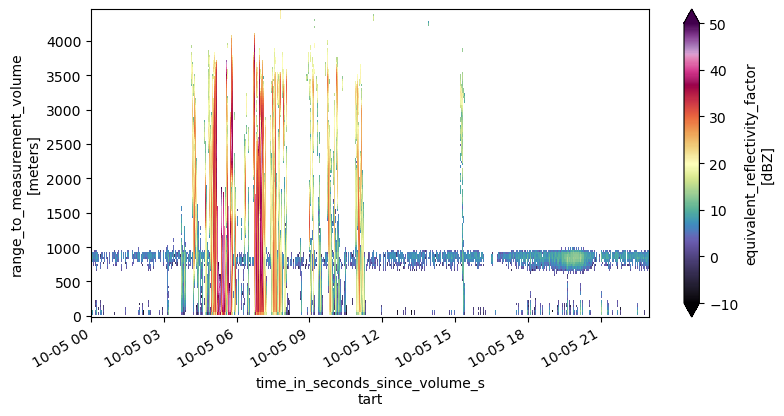

In [58]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('October 5.png', dpi=300, bbox_inches='tight')